In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import Counter
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import KNNImputer

# Analisi esplorativa

- Preparazione dei dati, le colonne vengono rimoninate e si crea un data frame per ogni indicatore

In [3]:
dt = pd.read_csv("dataset.csv")
dt = dt.loc[:, ~dt.columns.isin(['Country Code', 'Indicator Name', 'Attribute', 'Unnamed: 226'])]
dt = dt.rename(columns= {"Country Name":"name", "Indicator Code": "code"})
dt.head()

country_list = dt.name.unique()
indicator_list = dt.code.unique()
time_data = dt.columns[2:].to_numpy(dtype=np.int64)

In [4]:
prod_dt = dt.loc[dt['code'] == 'NGDP']
debt_dt = dt.loc[dt['code'] == 'GGXWDG']
rate_dt = dt.loc[dt['code'] == 'GGXWDG_GDP']

In [31]:
def get_element(table, column_name, index):
    return table.loc[:, column_name].iloc[index]

- Per ogni paese prendiamo il primo anno avvalorato e contiamo per ogni anno quanti paesi hanno come data per l'inizio dei dati l'anno considerato.
- Il primo grafico indica il numero di paesi (su un totale di 193) che hanno come hanno di inizio dei valori l'anno sull'asse X.
- Il secondo grafico mostra invece il totale dei paesi avvalorati all'aumentare del tempo.

(1914, 26)


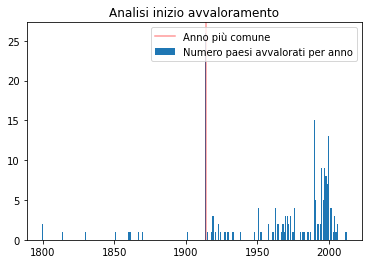

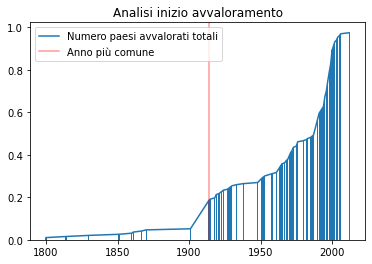

In [58]:
year_counter = debt_dt.iloc[:,2:].apply(pd.Series.first_valid_index, axis=1).to_numpy(dtype=np.int64)
year_counter = np.sort(year_counter)

counts = Counter(year_counter)
data = sorted(counts.items())

print(counts.most_common()[0])
x = [el[0] for el in data]
y = [el[1] for el in data]

new_y = []

for i in range(len(y)):
    value = 0
    for j in range(0,i+1):
        value = value + y[j]
    new_y.append(value)


        
new_y = np.array(new_y) / 193


plt.title("Analisi inizio avvaloramento")
plt.bar(x,y, label='Numero paesi avvalorati per anno')
plt.axvline(x=counts.most_common()[0][0], color='r', label='Anno più comune', alpha=0.4)
plt.legend()
plt.show()

plt.title("Analisi inizio avvaloramento")
plt.bar(x, new_y)
plt.plot(x,new_y, label='Numero paesi avvalorati totali')
plt.axvline(x=counts.most_common()[0][0], color='r', label='Anno più comune', alpha=0.4)
plt.legend()
plt.show()

- Mostriamo per i vari indicatori la percentuale di dati mancanti all'aumentare del tempo


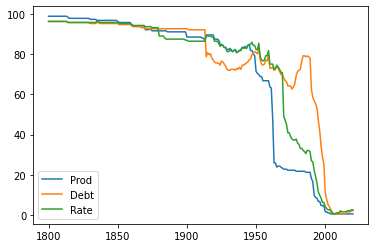

In [82]:

missing_prod_dt = prod_dt.isna().sum().to_numpy()[2:] / len(country_list) * 100
missing_debt_dt = debt_dt.isna().sum().to_numpy()[2:] / len(country_list) * 100
missing_rate_dt = rate_dt.isna().sum().to_numpy()[2:] / len(country_list) * 100

plt.plot(time_data, missing_prod_dt, label="Prod")
plt.plot(time_data, missing_debt_dt, label="Debt")
plt.plot(time_data, missing_rate_dt, label="Rate")
plt.legend()
plt.show()

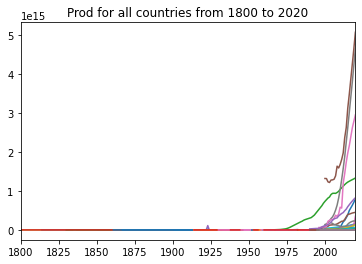

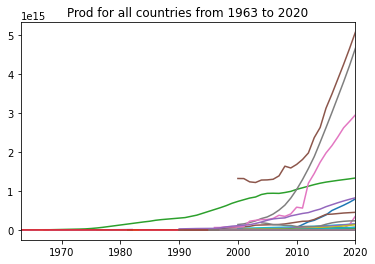

In [59]:
ac_data = debt_dt.iloc[:, 2:].to_numpy()

for row in ac_data:
    plt.plot(time_data, row)

plt.xlim([1800, 2020])
plt.title("Prod for all countries from 1800 to 2020")
plt.show()

for row in ac_data:
    plt.plot(time_data, row)
    
plt.xlim([1963, 2020])
plt.title("Prod for all countries from 1963 to 2020")
plt.show()

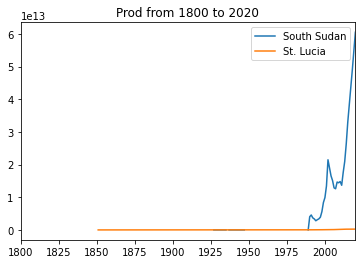

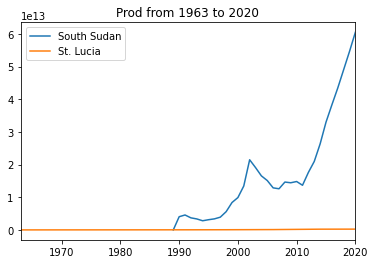

In [60]:
ac_data = debt_dt.iloc[:, 2:].to_numpy()
INDEX_1 = 1
INDEX_2 = 5


plt.plot(time_data, ac_data[INDEX_1], label=get_element(prod_dt, 'name', INDEX_1))
plt.plot(time_data, ac_data[INDEX_2], label=get_element(prod_dt, 'name', INDEX_2))
plt.xlim([1800, 2020])
plt.title(f"Prod from 1800 to 2020")
plt.legend()
plt.show()

plt.plot(time_data, ac_data[INDEX_1], label=get_element(prod_dt, 'name', INDEX_1))
plt.plot(time_data, ac_data[INDEX_2], label=get_element(prod_dt, 'name', INDEX_2))
plt.xlim([1963, 2020])
plt.title(f"Prod from 1963 to 2020")
plt.legend()
plt.show()



# Data Mining

Primo approccio naive, non si considerano le serie temporali, problema di alta dimensionalità

In [74]:
data = debt_dt.iloc[:, 2:].to_numpy()
imputer = KNNImputer(n_neighbors=5)
data = imputer.fit_transform(data.transpose()).transpose()
display(data.shape)




(188, 221)

ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.